In [1]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

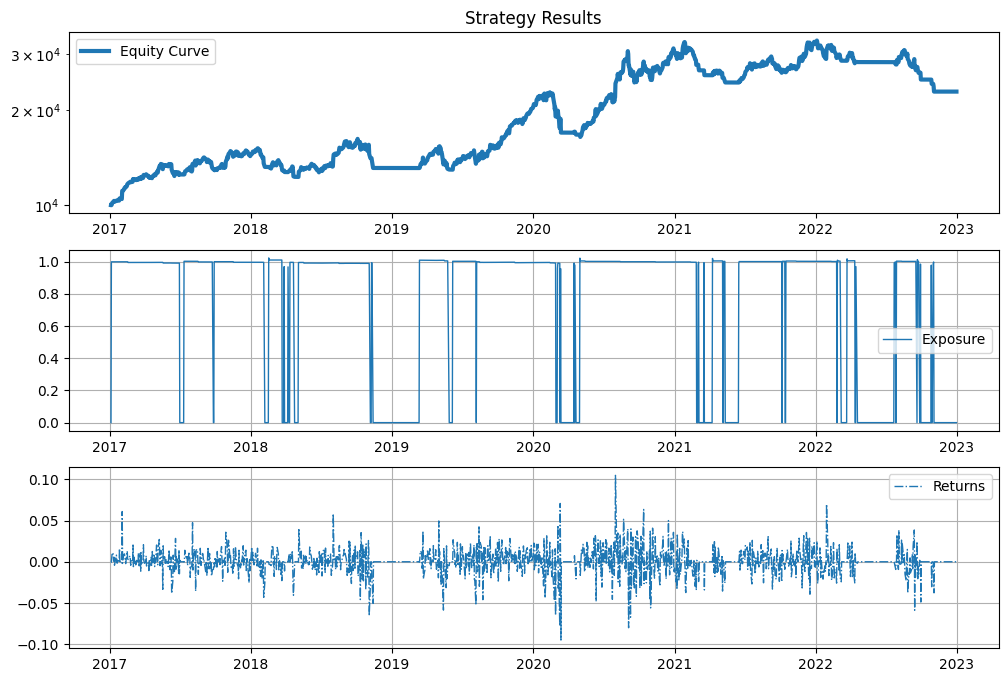

In [2]:
# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import date and time zone libraries
from datetime import datetime

# import pytz

# Import visualization
import matplotlib.pyplot as plt

import pandas as pd

import os

os.environ["ZIPLINE_ROOT"] = "/Volumes/Oahu/Workspace/zipline"

# BUNDLE_NAME = "quantopian-quandl"
BUNDLE_NAME = "polygon"

def initialize(context):
    # Which stock to trade
    context.stock = symbol("AAPL")

    # Moving average window
    context.index_average_window = 100


def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(
        context.stock, "close", context.index_average_window, "1d"
    )
    stock_weight = 1.0 if equities_hist.iloc[-1] > equities_hist.mean() else 0.0

    # Place order
    order_target_percent(context.stock, stock_weight)


def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))

    # First chart
    ax = fig.add_subplot(311)
    ax.set_title("Strategy Results")
    ax.semilogy(
        perf["portfolio_value"], linestyle="-", label="Equity Curve", linewidth=3.0
    )
    ax.legend()
    ax.grid(False)

    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf["gross_leverage"], label="Exposure", linestyle="-", linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf["returns"], label="Returns", linestyle="-.", linewidth=1.0)
    ax.legend()
    ax.grid(True)


# Set start and end date
# start_date = datetime(1996, 1, 1, tzinfo=pytz.UTC)
# end_date = datetime(2018, 12, 31, tzinfo=pytz.UTC)

# HistoryWindowStartsBeforeData: History window extends before 2016-01-05. To use this history window, start the backtest on or after 2016-05-27.
# start_date = pd.Timestamp(2020, 1, 2)
start_date = pd.Timestamp(2017, 1, 3)
end_date = pd.Timestamp(2022, 12, 30)


# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency="daily",
    bundle=BUNDLE_NAME,
)